# __FINANCIAL FORECASTING__

Financial forecasting is the process of estimating future financial outcomes or performance based on historical data, current trends, and various assumptions. It involves analyzing and predicting key financial metrics such as revenues, expenses, profits, cash flows, and financial ratios.

## __Geometric Browninan Motion__


Geometric Brownian Motion (GBM) is a mathematical model commonly used to describe the random movement of financial assets, such as stock prices, over time. It assumes that the logarithmic returns of the asset follow a normal distribution and that the asset's price changes are proportional to its current value. 

## __How Does GBM Work__
The GBM model has two main components required to predict data they are
1. #### __Drift__
    The drift component represents the average rate of return of the asset over time. It captures the long-term trend or growth rate.
<br>
    The drift is then computed as the mean of these logarithmic returns of the asset prices.
<br>

2. #### __Volatility__
    Volatility measures the amount of fluctuation or variability in the asset price. It accounts for the random or unpredictable movements observed in financial markets.
<br>
Volatility is calculated as the standard deviation of the logarithmic returns of the asset pricing.


## __Benifits of GBM Over Other Models__



1. GBM captures the inherent non-linearity and volatility clustering observed in financial markets, which linear regression fails to account for adequately. This makes GBM better suited to modeling complex and dynamic price movements.<br>


2. GBM is often preferred over linear regression in financial markets due to its ability to capture non-linear dynamics and irregularities, which are characteristic of financial data. Linear regression assumes a linear relationship, whereas GBM can model complex price movements, making it more suitable for financial forecasting.
<br>
3. GBM provides a realistic representation of price behavior by incorporating random price jumps, which other methods often struggle to capture effectively.

### __Libraries Used__

In [1002]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

### __Getting Historical Stock Data__
<br>
The yfinance mode was used to get historical data of stock prices of the required stock, in this case the NASDAQ Index, which is a stock market index that tracks the performance of over 3,000 stocks listed on the Nasdaq Stock Market.
A two week long dataset was chosen to ensure that dips in value due to external factors can be ignored. 

In [1003]:
ticker = "NDX"
data = yf.download(ticker, start="2023-05-15", end="2023-06-01")
prices = data["Close"].values
dates = data.index.date


[*********************100%***********************]  1 of 1 completed


### __Computing The Predicted Price__

This line calculates the logarithmic returns of the stock prices that are generated using the yfinance model .

In [1004]:
returns = np.log(prices[1:] / prices[:-1])

Now the mean and the standard deviations are calculated to find the general trend in the asset , the standard deviation helps in accounting for large fluctuations in the prices.

In [1005]:
drift = np.mean(returns)
volatility = np.std(returns)

The starting value and the time period are set here , the number of simulations to be generated are determined here.

In [1006]:
current_price = prices[-1]
time_period = 15  
num_simulations = 1 


An upward bias is set as most stock prices tend upward but large negative values can reduce this bias resulting in overall accurate values .<br><br>
Make an empty 2d numpy array and then set the columns to the simulation prices<br>
<br>
The for loop does the simulations using a random variable generated based on drift and velocity.

In [1007]:
upward_bias = 0.02  
predicted_prices = np.zeros((num_simulations, time_period))
predicted_prices[:, 0] = current_price

for i in range(num_simulations):
    for j in range(1, time_period):
        random_variable = np.random.normal(drift, volatility)
        upward_shift = (j / time_period) * upward_bias * current_price
        predicted_prices[i, j] = predicted_prices[i, j - 1] * np.exp(random_variable) + upward_shift

### __Plotting the Data__

MatPlot library was used to plot the graph

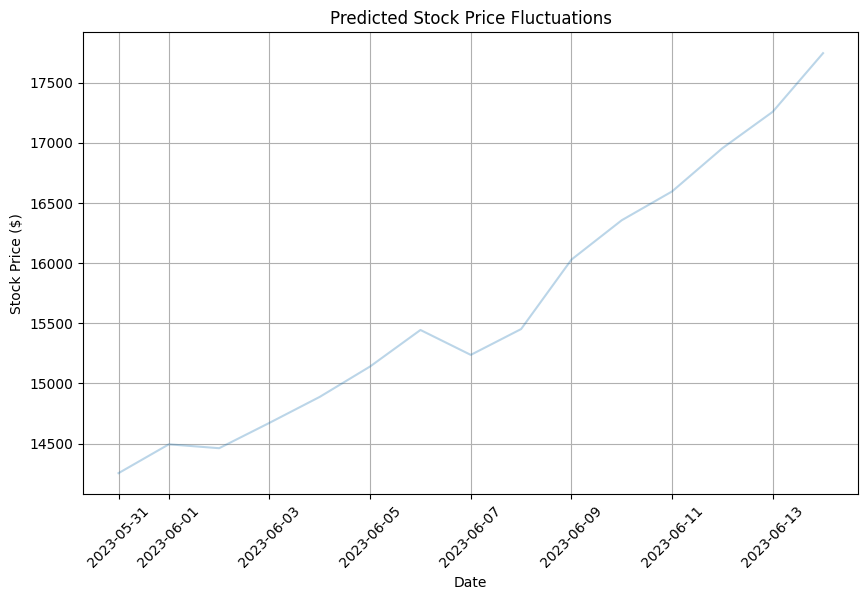

In [1008]:
start_date = dates[-1]
x_dates = [start_date + timedelta(days=j) for j in range(time_period)]
plt.figure(figsize=(10, 6))

for i in range(num_simulations):
    plt.plot(x_dates, predicted_prices[i, :], alpha=0.3)

plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Predicted Stock Price Fluctuations")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## __Validating Accuracy__

The predictions dates are dated 5 days prior to the presention to allow validation of the accuracy of the model.
<br><br>
The reason to generate 3 graphs is to keep a realistic range of the predictions. In the field of financial forecasting , external factors play a mojor roles . This model only considers previous prices of the stock and does partially consider major fluctuations by factoring standard deviation and external factors can reduce the accuracy of the predictions.
<br><br>
The predictions were mostly accurate during the testing of the model.
<br><br>
Below is the graph of real stock prices

[*********************100%***********************]  1 of 1 completed


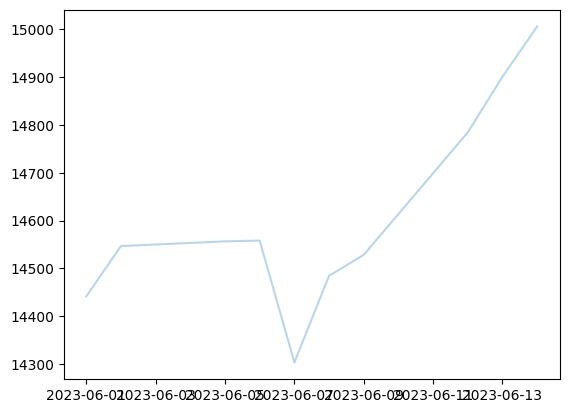

In [1009]:

data = yf.download(ticker, start="2023-06-01", end="2023-06-15")
prices = data["Close"].values
dates = data.index.date
plt.plot(dates[-time_period:], prices[-time_period:], alpha=0.3,)
# plt.plot(dates[-time_period:], prices[-time_period:], marker="o", color="red", label="Actual Prices")
plt.show()

# __Conclusion__

In conclusion , it has been shown that using the factors of drift and volatility as defined in the GBM model, the future value of a given asset can be nearly accurately predicted. Even though there are limitations to the model , it is the mostly widely accepted due its ability to predict dips in asset values and account for sudden jumps as well.

Financial Forecasting is a volatile field where non financial factors such as geopolitics and social factors play a mojor role , hence no model can truely predict asset values accurately.